In [185]:
import numpy as np
import scipy.stats as st # sp # scipy.stats -> st
import matplotlib.pyplot as plt
import seaborn as sns

### Теория Вероятностей и Математическая Статистика

#### События и пространство событий

Предположим, у нас есть честная монета, которая с одинаковой вероятностью выпадет орлом (O) или решкой (P).

В подобных случаях, когда два исхода равновероятны, мы можем использовать теорию вероятностей, чтобы выразить вероятность конкретного **события**, сравнивая его с **пространством событий** (набором всех возможных исходов; обозначим как $\Omega$):

$$ P(\text{event}) = \frac{\text{# событий}}{\text{# все события в заданном пространстве }\Omega} $$

**Упражнения**:

1. Какова вероятность того, что два раза подряд выпадет туз пик? (Предположим, что любая карта, вытянутая при первом взятии, будет возвращена в колоду перед вторым взятием.)

$$ P(ace of spades) x P(ace of spades) = (\frac{1}{52})^2 = \frac{1}{2704} = 0.00037 = 0.037%$$

2. Вы берете карту из колоды карт из 52 штук. Какова вероятность того, что вытянутую карту, при условии что ее вернули обратно в колоду и тщательно перетасовали колоду, вытянут повторно?
$$ P(\text{any card}) = \frac{52}{52} = 1 $$
$$ P(\text{same card as first draw}) = \frac{1}{52} \approx 0.019 $$
$$ P(\text{any card})P(\text{same card as first draw}) = (1)(\frac{1}{52}) = \frac{1}{52} \approx 0.019$$

3. Используйте $n \choose k$, чтобы вычислить вероятность выпадения трех решек при пяти подбрасываниях монеты.


3. $$ {n \choose k} = {5 \choose 3} = \frac{5!}{3!(5 - 3)!} = \frac{5!}{(3!)(2!)} = \frac{5 \times 4 \times 3 \times 2 \times 1}{(3 \times 2 \times 1)(2 \times 1)} = \frac{120}{(6)(2)} = \frac{120}{12} = 10 $$

$$P = \frac{10}{2^n} = \frac{10}{2^5} = \frac{10}{32} = 0.3125 $$

4. Создайте функцию Python, которая решает упражнение 3 и включает формулу $n \choose k$ $\frac{n!}{k!(n - k)!}$. Имея этот метод, подсчитайте вероятность выпадения орла (ноль, один, два, три, четыре и пять) за пять бросков.

In [186]:
from math import factorial

def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n

In [187]:
coinflip_prob(5, 3)

0.3125

In [188]:
[coinflip_prob(5, h) for h in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

#### Закон Больших Чисел (ЗБЧ)

Хотя монета априори должна выпадать решкой в 50% случаев, при небольших размерах выборки, существует вероятность того, что в таком эксперименте мы могли бы подбрасывать решку при всех подбрасываниях. Например, мы подсчитали, что вероятность того, что мы выпадем решкой при каждом броске, составляет 3,1 % в небольшом эксперименте с пятью бросками.


**Закон больших чисел** гласит, что чем больше экспериментов мы проводим, тем ближе мы приближаемся к ожидаемой вероятности.


Чтобы проверить данный закон, создадим вектор экспоненциально возрастающего числа подбрасываний монеты за эксперимент:

In [189]:
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288])
np.random.seed(42) # for reproducibility

Метод `binomial()` - достаточно представить два аргумента как *количество подбрасываний монеты в эксперименте* и *вероятность выпадения орла (решки)*, он возвращает количество подбрасываний орла в эксперименте.

In [190]:
np.random.binomial(1, 0.5)

0

In [191]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2,
 3,
 4,
 6,
 13,
 27,
 54,
 136,
 258,
 509,
 1038,
 2094,
 4098,
 8167,
 16335,
 32974,
 65787,
 130589,
 261316]

In [192]:
proportion_heads = heads_count/ns
print(proportion_heads)

[1.         0.75       0.5        0.375      0.40625    0.421875
 0.421875   0.53125    0.50390625 0.49707031 0.50683594 0.51123047
 0.50024414 0.49847412 0.49850464 0.50314331 0.50191498 0.4981575
 0.49842072]


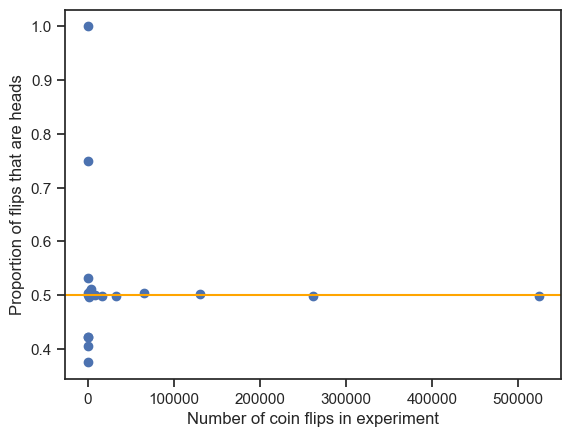

In [193]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(ns, proportion_heads)

На данном этапе важно разобраться с **заблуждением игрока** (ошибкой выжившего, погрешностью). Распространенным заблуждением является то, что закон больших чисел гласит, что если, скажем, пять раз подряд выпал орел, то вероятность выпадения решки выше при шестом подбрасывании. На самом деле теория вероятности утверждает, что каждый бросок монеты полностью независим от всех остальных. Таким образом, при каждом подбрасывании правильной монеты вероятность выпадения орла составляет 50 %, независимо от того, что произошло при предыдущих подбрасываниях.

### Математическая Статистика и Теория вероятностей
Область статистики применяет теорию вероятностей, чтобы делать выводы с измеримой степенью достоверности. Например, предположим, что мы провели эксперимент с подбрасыванием пяти монет 1000 раз с честной монетой:

In [221]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

Мы можем визуализировать результаты нашего эксперимента, чтобы создать **распределение вероятностей**:

In [222]:
heads, event_count = np.unique(heads_count, return_counts=True)

In [223]:
print(heads)

[0 1 2 3 4 5]


In [224]:
print(event_count)

[ 36 152 314 316 145  37]


In [225]:
event_proba = event_count/n_experiments
print(event_proba)

[0.036 0.152 0.314 0.316 0.145 0.037]


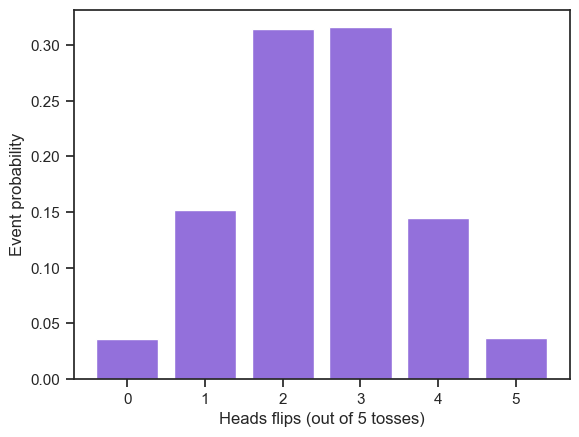

In [226]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

### Expected Value (мат ожидание)


In [227]:
P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

$$ \mathbb{E} = \sum_x xP(x) $$

In [228]:
E = sum([P[x]*x for x in range(6)])
E

2.5

#### Меры Центральной Тендеции

#### Среднее значение (Mean)

Наиболее популярная метрика центральной тенденции, обозначается как $\mu$ (генеральная совокупность) or $\bar{x}$ (выборка):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$


In [229]:
len(heads_count)

1000

In [230]:
print(heads_count[0:20])

[3 3 2 2 2 4 3 2 1 2 0 1 2 2 2 2 4 0 2 3]


In [231]:
sum(heads_count)/len(heads_count)

2.493

Реализация в NumPy

In [232]:
np.mean(heads_count)

2.493

In [233]:
heads_count.mean()

2.493

Разновидностью среднего является среднее усеченное, которое вычисляется путем отбрасывания фиксированного числа сортированных значений с каждого конца последовательности и затем взятия среднего арифметического оставшихся значений.
Среднее усеченное устраняет влияние предельных значений. Например такое используется в международных соревнованиях по прыжкам в воду и гимнастике, верхние и нижние баллы двух из пяти судей отбрасываются и итоговым баллом считается среднеарифметический балл трех оставшихся судей.

In [234]:
def trimmed_mean(array, percent):
    n = len(sorted(array))
    k = int(round(n*(float(percent)/100)/2))
    return np.mean(array[k+1:k-1])

In [235]:
random_numbers = np.random.randint(low=12, high=500, size=(450,), dtype=np.int16)
print("Mean: ", round(np.mean(random_numbers), 2))

Mean:  265.14


In [236]:
print(f"Trimmed mean: {round(trimmed_mean(random_numbers, 0.10),2)}")

Trimmed mean: 265.0


#### Медиана (Median)

Второй наиболее распространенной мерой центральной тенденции является **медиана**, серединное значение в распределении.


Медиана - число, расположенное в отсортированном списке данных ровно посередине. Если число данных четное, срединным значением является то, которое не находится в наборе данных фактически, а является средним арифметическим двух значений, которые делят отсортированные данные на верхнюю и нижние границы. По сравнению со средним, которое зависит от всех значений в последовательности данных, медиана зависит только от значений в центре отсортированных данных. Медиана называется робастной оценкой центрального положения, поскольку она не находится под влиянием выбросов, которые могут исказить результаты.


Выброс - это любое значение которое сильно удалено от других значений в наборе данных.

In [237]:
heads_count.sort()

In [238]:
print(heads_count[0:20])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [239]:
print(heads_count[-20:])

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


In [240]:
len(heads_count)

1000

In [241]:
heads_count[499]

2

In [242]:
heads_count[500]

2

In [243]:
(3+3)/2

3.0

In [244]:
np.median(heads_count)

2.0

Вопсользуемся датасетом:

In [245]:
import pandas as pd

crime_reports = pd.read_csv('./datasets/crime_report_1975_2015_us.csv')
crime_reports.head().T

,0,1,2,3,4
report_year,1975,1975,1975,1975,1975
agency_code,NM00101,TX22001,GAAPD00,CO00101,TX22701
agency_jurisdiction,"Albuquerque, NM","Arlington, TX","Atlanta, GA","Aurora, CO","Austin, TX"
population,286238.0,112478.0,490584.0,116656.0,300400.0
violent_crimes,2383.0,278.0,8033.0,611.0,1215.0
homicides,30.0,5.0,185.0,7.0,33.0
rapes,181.0,28.0,443.0,44.0,190.0
assaults,1353.0,132.0,3518.0,389.0,463.0
robberies,819.0,113.0,3887.0,171.0,529.0
months_reported,12.0,12.0,12.0,12.0,12.0


In [246]:
crime_reports.report_year.value_counts()[-10:]

report_year
1985    69
1986    69
1987    69
1988    69
1989    69
1990    69
1991    69
1992    69
1993    69
2015    69
Name: count, dtype: int64

In [247]:
print("Average roberies during dataset history: ", round(crime_reports.robberies.mean(), 2))
print("Median  roberies during dataset history: ", round(crime_reports.robberies.median(), 2))

Average roberies during dataset history:  4000.25
Median  roberies during dataset history:  1940.0


In [248]:
print("Average roberies during dataset history: ", round(crime_reports.homicides.mean(), 2))
print("Median  roberies during dataset history: ", round(crime_reports.homicides.median(), 2))

Average roberies during dataset history:  398.39
Median  roberies during dataset history:  64.0


#### Мода (Mode)
**Мода** — это последняя общая мера центральной тенденции. Это просто значение в распределении, которое встречается чаще всего.

SciPy `stats` module:

In [249]:
st.mode(heads_count, keepdims=True)

ModeResult(mode=array([3]), count=array([316]))

In [250]:
st.mode(heads_count, keepdims=True)[0][0]

3

При небольших размерах выборки среднее обычно обеспечивает наиболее точную меру центральной тенденции.

При больших размерах выборки среднее значение, медиана и мода будут иметь тенденцию совпадать, если распределение не перекошено:

In [251]:
x = st.skewnorm.rvs(0, size=1000) # first argument is "skewness"; 0 has no skew

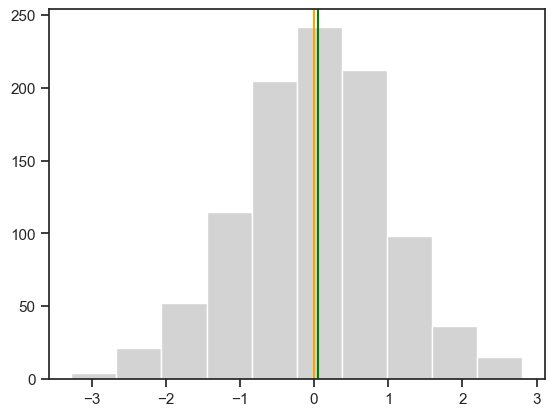

In [252]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

Асимметричные распределения, напротив, уводят среднее значение от центра к хвосту:

In [253]:
x = st.skewnorm.rvs(10, size=1000)

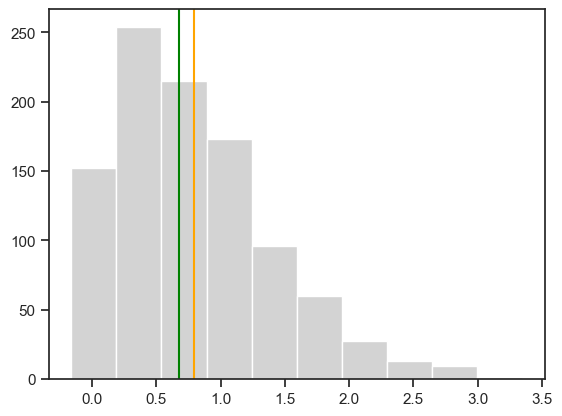

In [255]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

Для непрерывных распределений с асимметрией (например, данные о заработной плате) медиана обычно является предпочтительной мерой центральной тенденции:

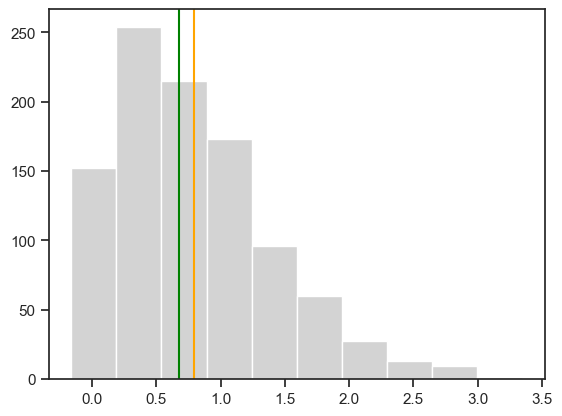

In [256]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Квантили (Quantiles)

Медиана, которая делит распределение пополам в его средней точке, является наиболее известным примером квантиля:

In [257]:
np.median(x)

0.6796694441095383

In [261]:
np.quantile(x, 0.95)

1.9323976542775014

In [262]:
np.percentile(x, 0.95)

-0.08241616988259173

В целом, квантили просто делят распределения, наиболее распространенными являются:

* процентили,
* Квартили и
* Децили.

**Процентили** делят распределение в любой точке измерения из ста ("pour cent" по-французски означает "из ста"). Иными словами это значение, которое заданная случайная величина не превышает с фиксированной вероятностью, заданной в процентах.

Например, если мы хотим определить пороговое значение для верхних 5% распределения, мы урежем его на уровне 95-го процентиля. Или, для верхнего 1%, мы сократили бы на 99-м процентиле.

In [263]:
p = np.percentile(x, [95, 99])
p

array([1.93239765, 2.63338746])

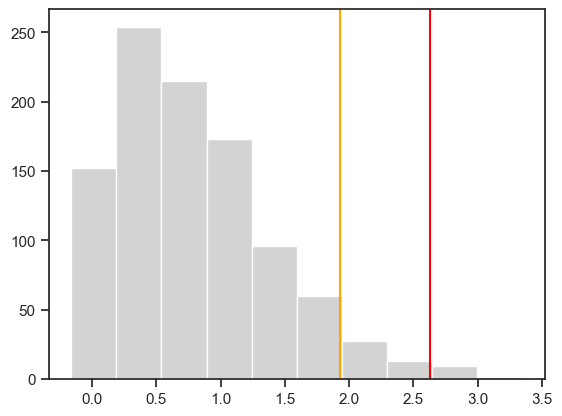

In [264]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

**Квартили**, как следует из их названия, представляют собой квантили, которые делят распределение на четверти, разделяя распределение на 25-й процентиль, медиану (также известную как 50-й процентиль) и 75-й процентиль:

In [265]:
q = np.percentile(x, [25, 50, 75])
q

array([0.32312638, 0.67966944, 1.14765058])

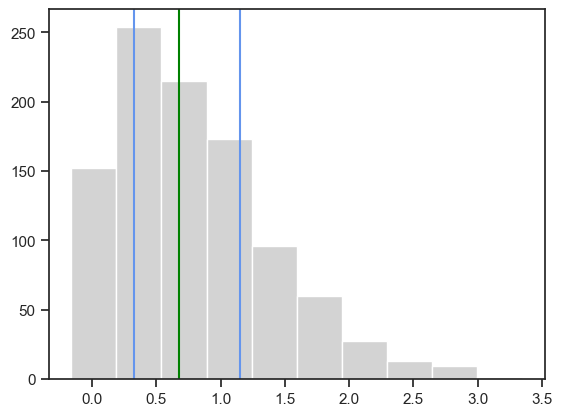

In [266]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

### The Box-and-Whisker Plot

In [267]:
sns.set(style='whitegrid')

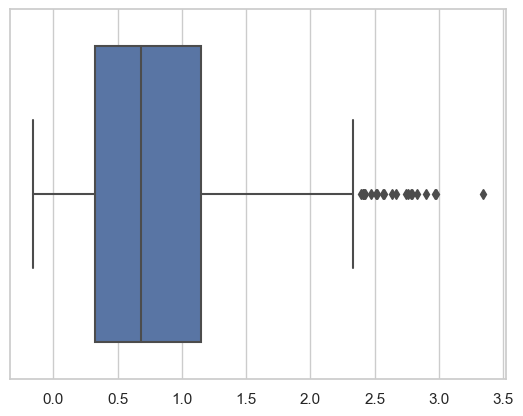

In [268]:
_ = sns.boxplot(x=x)

Края прямоугольника и медиана определяются квартилями:

In [269]:
q

array([0.32312638, 0.67966944, 1.14765058])

Края прямоугольника определяют **межквартильный диапазон** (IQR):

In [271]:
r = 1.14 - 0.33125
r

0.8087499999999999

Длина усов определяется самыми дальними точками данных в пределах $1,5 \times \text{IQR}$ от краев прямоугольника.

In [272]:
0.33125 - 1.5*r

-0.8818749999999997

В распределении есть несколько (одиннадцать) значений за пределами. Эти значения считаются **выбросами** и отображаются в виде отдельных точек:

In [274]:
x.sort()

In [275]:
print(x[-15:])

[2.51401632 2.51486746 2.56141979 2.5761917  2.63302539 2.6692332
 2.7431783  2.75807161 2.78568039 2.78955444 2.83341887 2.90125914
 2.96653691 2.97529234 3.34698201]


# Оценки вариабельности (Variability Measures)

Мера центрального положения - одна из размерностей в обобщении признака. Вторая размерность - вариабельность (variability). Также можно встретить такой термин как "дисперсность". Такие оценки показывают сгруппированны ли значения данных плотно либо разбросаны.

Термины:
- Отклонения (deviations) - разница между наблюдаемыми значениями и оценкой центрального положения
- Дисперсия  (dispersion) - сумма квадратических отклонений от среднего, деленная на n-1 (число значений данных)
- Стандартное отклонение (standard deviation) - квадратный корень из дисперсии (l2 norm)
- Размах (range) - разница между самым большим и самым малым значением в наборе данных
- Порядковые статистики (order statistics) - метрические показатели на основе значений данных отсортированных от самых малых до самых больших
- Процентиль (percentile) - такое значение, что Р процентов значений принимает данное значение или меньшее и (100 - Р) процентов значений принимает данное значение или большее
- Межквартильный размарх - разница между 75-ым и 25-ым персентилями

# Среднее абсолютное отклонение (Mean Absolute Deviation):

In [276]:
crime_reports = crime_reports[['report_year', 'robberies', 'crimes_percapita', 'population', 'agency_jurisdiction']]
crime_reports.head()

,report_year,robberies,crimes_percapita,population,agency_jurisdiction
0,1975,819.0,832.52,286238.0,"Albuquerque, NM"
1,1975,113.0,247.16,112478.0,"Arlington, TX"
2,1975,3887.0,1637.44,490584.0,"Atlanta, GA"
3,1975,171.0,523.76,116656.0,"Aurora, CO"
4,1975,529.0,404.46,300400.0,"Austin, TX"


In [277]:
crime_reports = crime_reports[crime_reports.agency_jurisdiction == 'New York City, NY']

In [278]:
print(f"Mean robberies in NY: {round(crime_reports.robberies.mean(),2)}")

Mean robberies in NY: 56737.76


In [279]:
crime_reports.robberies.describe()

count        41.000000
mean      56737.756098
std       31536.094562
min       16581.000000
25%       24373.000000
50%       59278.000000
75%       84043.000000
max      107475.000000
Name: robberies, dtype: float64

Дисперсия и стандартное отклонение - наиболее широко распространенные и в рутинном порядке регистрируемые статистики вариабельности. Оба показателя чувствительны к выбросам. Более робастные оценки включают в себя среднее абсолютное отклонение, медианное абсолютное отклонение от медианы и процентили (квантили).

#### Персентили

In [281]:
crime_reports[['crimes_percapita']].quantile([0.0, 0.05, 0.25, 0.5, 0.75, 0.95]).T

,0.00,0.05,0.25,0.50,0.75,0.95
crimes_percapita,551.81,585.77,673.05,1557.79,1995.25,2299.86


IQR является относительно редкой мерой дисперсии значений вокруг центра распределения. Наиболее широко используются:

* Дисперсия,
* Стандартное отклонение и
* Стандартная ошибка.


**Variance(Дисперсия)**

($\sigma^2$)

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [282]:
xbar = np.mean(x)
xbar

0.7959257187636651

In [283]:
squared_differences = [(x_i - xbar)**2 for x_i in x]

In [ ]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

In [284]:
# NumPy
np.var(x)

0.37058017704885865

#### Standard Deviation

Прямая производная дисперсии — это **стандартное отклонение** (обозначается $\sigma$), что удобно, поскольку его единицы измерения находятся в том же масштабе, что и значения в распределении:

$$ \sigma = \sqrt{\sigma^2} $$

In [285]:
sigma = sigma_squared**(1/2)
sigma

0.6293595210531706

In [286]:
np.std(x)

0.608752968821392

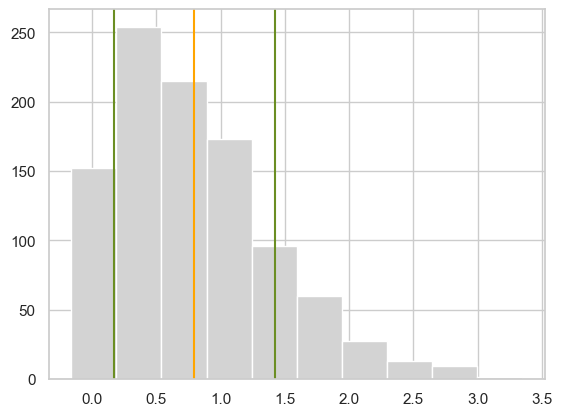

In [287]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

Еще одним производным стандартного отклонения является **стандартная ошибка**, которая обозначается $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [288]:
sigma/(len(x))**(1/2)

0.01990209553640712

In [289]:
st.sem(x) # defaults to 1 degree of freedom (n-1), which can be ignored with the larger data sets of ML

0.0192600915931632

In [290]:
st.sem(x, ddof=0) # 0 degrees of freedom (n)

0.019250459138650658

Стандартная ошибка позволяет нам сравнить, различаются ли *значительно* средние значения двух распределений.

# Оценки отношений между переменными (Relatedness Measures)

Если у нас есть два вектора одинаковой длины, $x$ и $y$, где каждый элемент $x$ связан с соответствующим элементом $y$, **ковариация** показывает меру того, насколько связаны признаки друг с другом:


$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [292]:
x = crime_reports.robberies
y = crime_reports.population

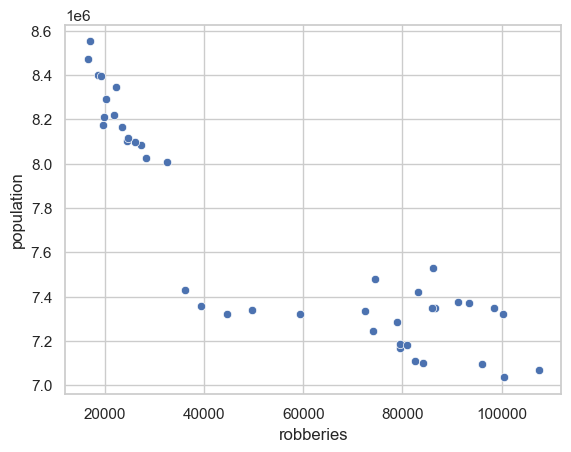

In [294]:
_ = sns.scatterplot(x=x, y=y)

Метод NumPy `cov()` возвращает **ковариационную матрицу**, которая является матрицей $2 \times 2$, поскольку $x$ и $y$ вместе описывают двумерное пространство:

In [295]:
np.cov(x, y, ddof=0)

array([[ 9.70268547e+08, -1.33616288e+10],
       [-1.33616288e+10,  2.32301433e+11]])

Диагональные элементы ковариационной матрицы представляют дисперсию $x$ и $y$ соответственно:

In [296]:
np.var(x)

970268546.5746579

In [297]:
np.var(y)

232301432889.32898

Если $x$ и $y$ связаны обратной зависимостью, их ковариация отрицательна. Чем меньше они связаны, тем ближе их ковариация к нулю:

#### Корреляция (Correlation)

Недостатком ковариации является то, что она смешивает относительную шкалу двух переменных с мерой связанности переменных. **Корреляция** строится на ковариации и преодолевает этот недостаток за счет масштабирования, тем самым измеряя исключительно связанность. Корреляция гораздо более распространена.

Коэффициент корреляции (разработанный Карлом Пирсоном ) часто обозначается как $r$ или $\rho$ и определяется как:
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [298]:
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

In [299]:
sigma_x = sigma_sq_x**(1/2)
sigma_y = sigma_sq_y**(1/2)

In [300]:
cov / (sigma_x * sigma_y)

-0.11756978087951572

In [301]:
st.pearsonr(x, y)

PearsonRResult(statistic=-0.8899948282177652, pvalue=7.080023242315153e-15)

#### Распределения

### Uniform

Равномерное распределение имеет постоянные вероятности во всем диапазоне значений:

Примеры из реального:

* Игра в кости (PMF)
* Розыгрыш карт (PMF)
* Гиперпараметры модели
* Выброс радиоактивных частиц
* Экономический спрос

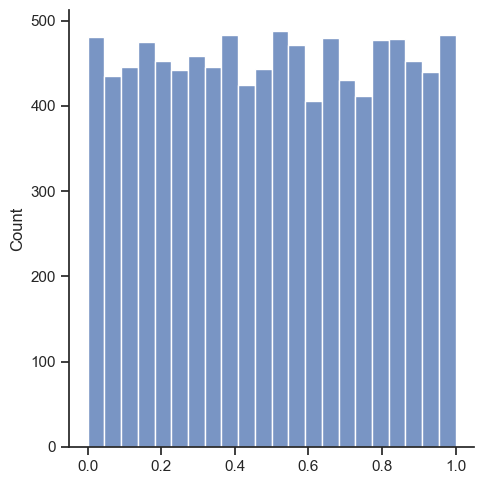

In [302]:
u = np.random.uniform(size=10000)
sns.set_style('ticks')
_ = sns.displot(u)

### Gaussian

Карл Фридрих Гаусс (немецкий математик и ученый 19 века) является автором более сотни концепций в математике, физике и астрономии. Одной из таких концепций является распределение Гаусса или **нормальное распределение**:

Примеры из реального мира:

* Вероятность выпадения орла при *n* бросках
* Рост взрослых женщин
* Рост взрослых мужчин
* Результаты тестов на образование, например, SAT, ЦТ, GMAT etc


Нормальные распределения на сегодняшний день являются наиболее распространенными распределениями в статистике и машинном обучении. Обычно они используются по умолчанию, особенно если у вас ограниченная информация о моделируемом случайном процессе, потому что:

1. Нормальные распределения предполагают максимально возможную неопределенность случайной величины, которую они представляют (по сравнению с любым другим распределением эквивалентной дисперсии).
2. Как простые, так и очень сложные случайные процессы при всех обычных условиях имеют нормальное распределение, когда мы выбираем значения из процесса. Поскольку мы отбираем данные как для статистических моделей, так и для моделей машинного обучения, эта так называемая **центральная предельная теорема** (рассмотренная далее) является критически важной концепцией.

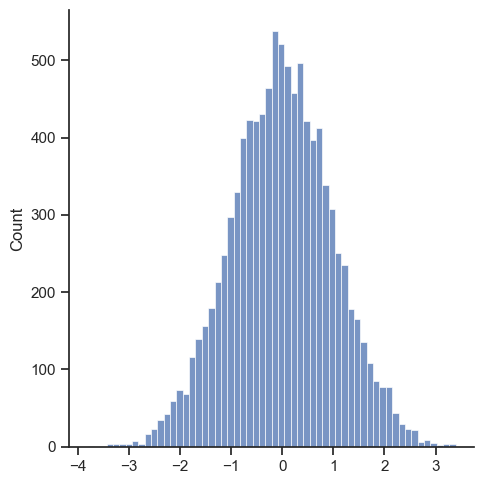

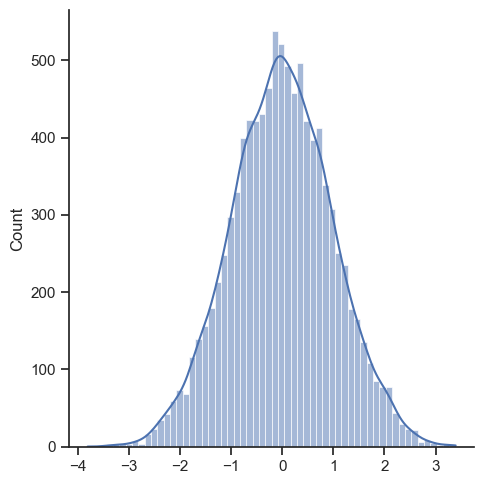

In [303]:
x = np.random.normal(size=10000)
_ = sns.displot(x)
_ = sns.displot(x, kde=True)

In [304]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

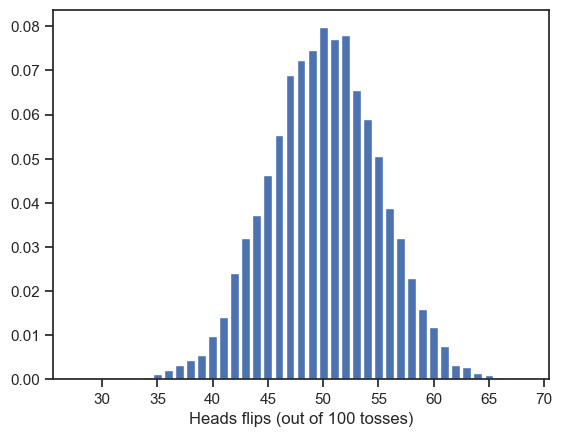

In [305]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

### Центарльная предельная теорема


Чтобы получить представление о ЦПТ, давайте возьмем некоторые значения из нашего нормального распределения:

In [306]:
x_sample = np.random.choice(x, size=10, replace=False)
print(x_sample)

[ 0.28896942  0.5425503  -1.29083033 -0.037922   -1.8065068  -0.30444804
 -0.51730522 -0.15384578 -0.67657166 -0.37590203]


Среднее значение выборки не всегда будет близко к нулю для такой маленькой выборки:

In [307]:
np.mean(x_sample)

-0.433181213762846

Давайте определим функцию для генерации **выборочных распределений** среднего значения заданного входного распределения:

In [308]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

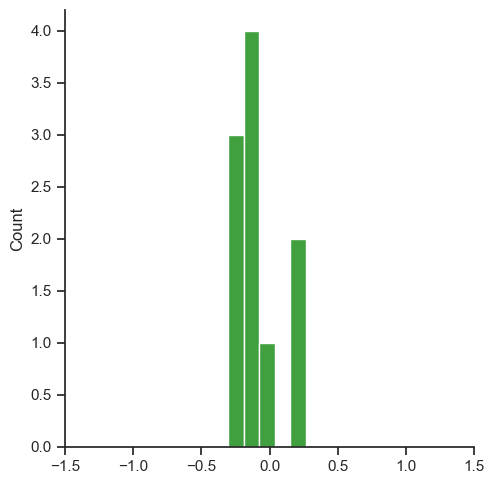

In [309]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

Чем больше выборок мы возьмем, тем больше вероятность того, что выборочное распределение средних значений будет нормально распределенным:

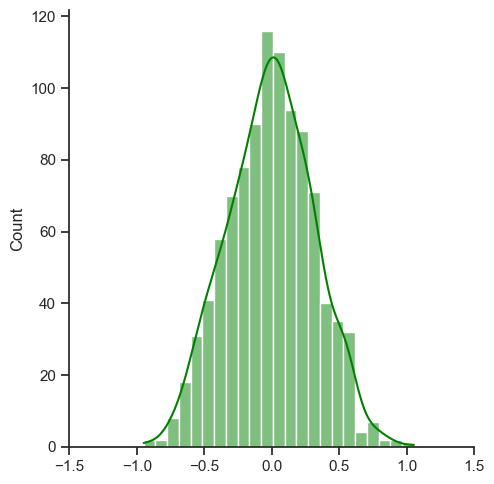

In [310]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Чем больше выборка, тем ближе средние значения выборки будут к среднему значению генеральной совокупности:

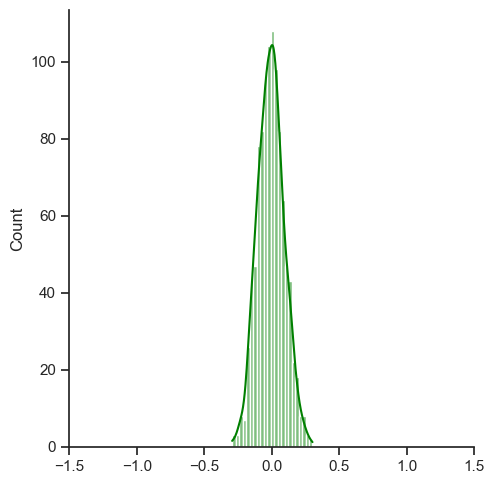

In [311]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

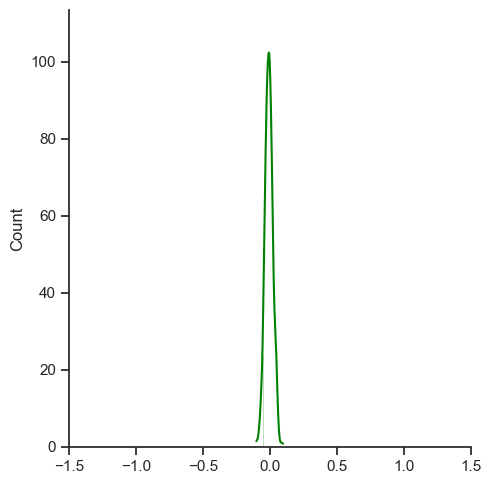

In [312]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Выборка из ассиметричного распределения

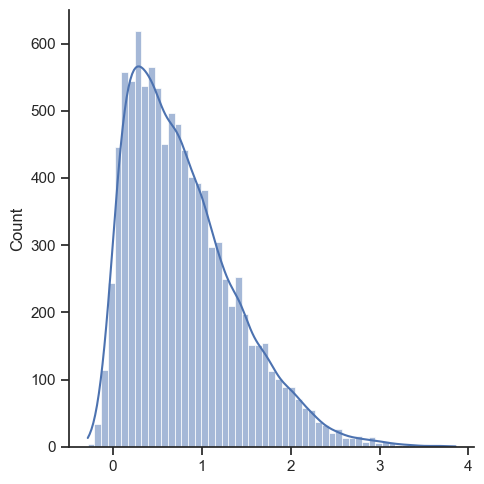

In [313]:
s = st.skewnorm.rvs(10, size=10000)
_ = sns.displot(s, kde=True)

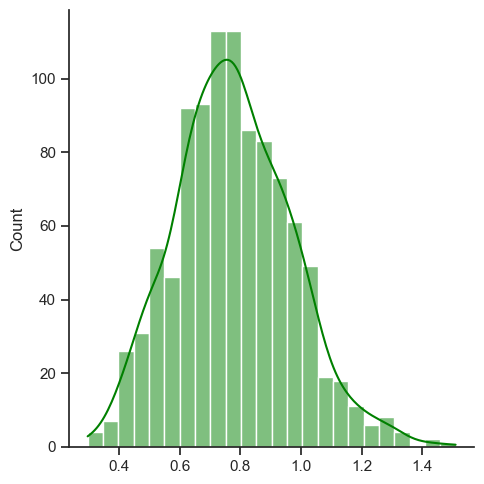

In [314]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

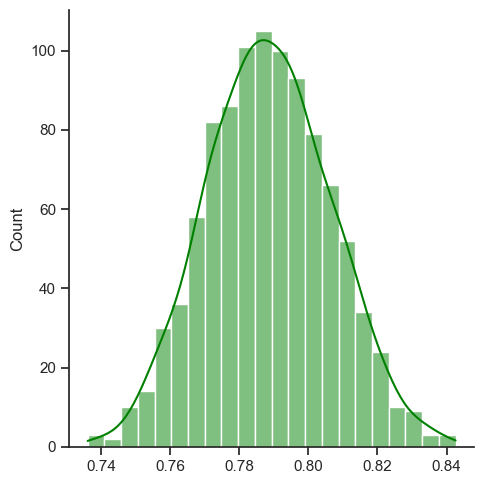

In [315]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Выборка из мультимодального распределения

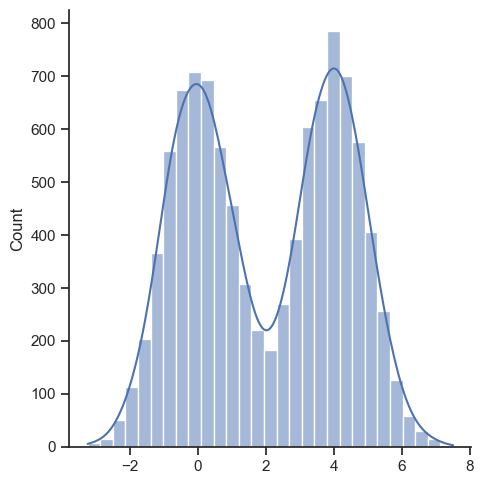

In [316]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))
_ = sns.displot(m, kde=True)

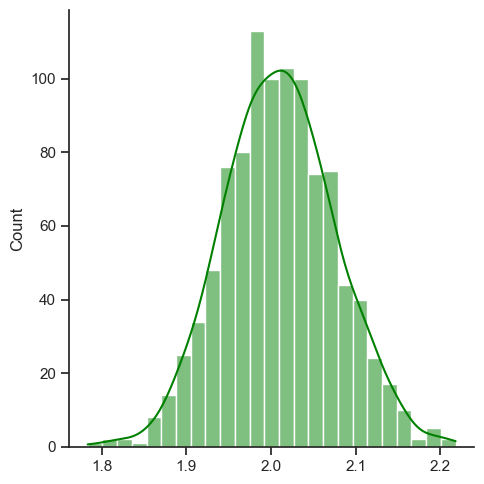

In [317]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Выборка из унимодального распределения


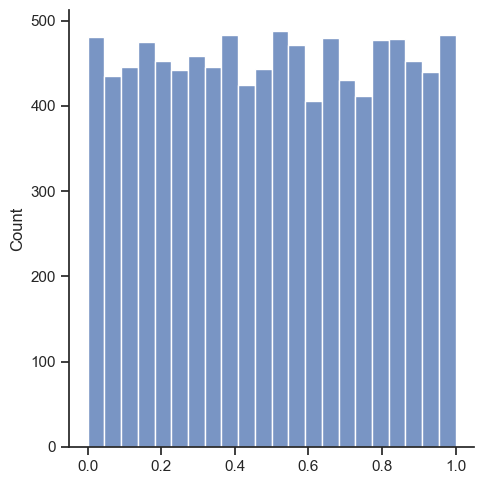

In [318]:
_ = sns.displot(u)


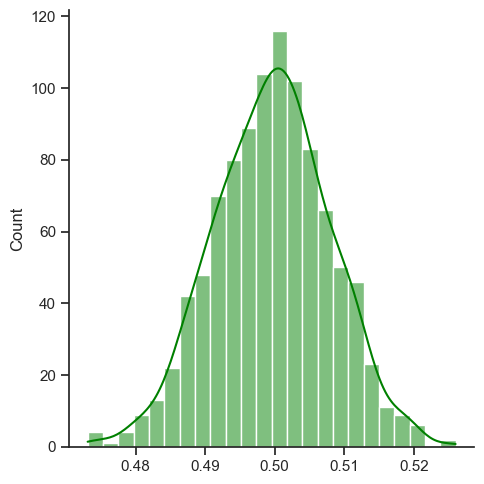

In [319]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Следовательно, при достаточно больших размерах выборки мы можем предположить, что выборочное распределение средних значений будет нормально распределенным, что позволит нам применять статистические модели и модели машинного обучения, настроенные для нормально распределенного шума, что часто является предположением по умолчанию.



### Log-Нормальное распределение

Натуральный логарифм **логарифмически нормального** распределения имеет нормальное распределение:

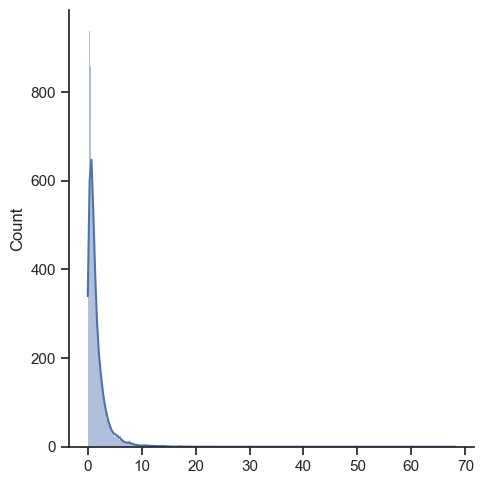

In [320]:
x = np.random.lognormal(size=10000) # defaults to standard normal mu=0, sigma=1
_ = sns.displot(x, kde=True)

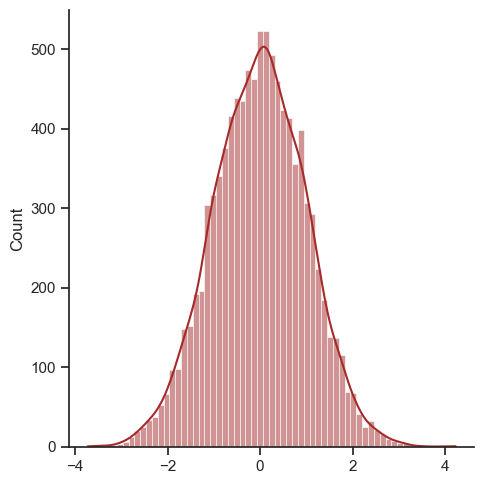

In [321]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Примеры из реальной жизни:

* Доход
* Длина комментариев на интернет-форумах
* Продолжительность игры в шахматы или сборки кубика Рубика
* Размер общедоступных видеофайлов
* Количество случаев госпитализации во время эпидемии

### Exponential Distribution

Относительно уменьшается до нуля, а затем экспоненциально уменьшается в сторону более высоких значений. Логнормальное распределение, напротив, может принимать отрицательные значения и как увеличиваться, так и уменьшаться.

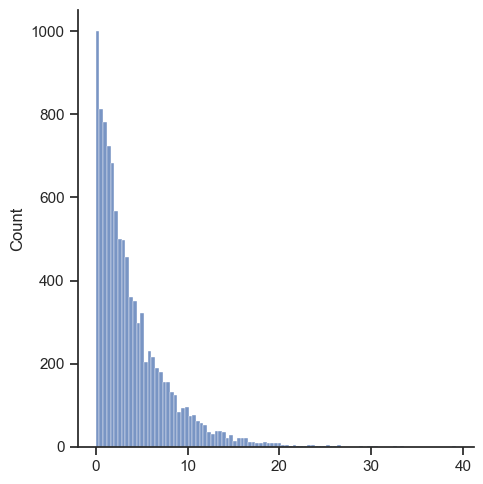

In [322]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one
_ = sns.displot(x)

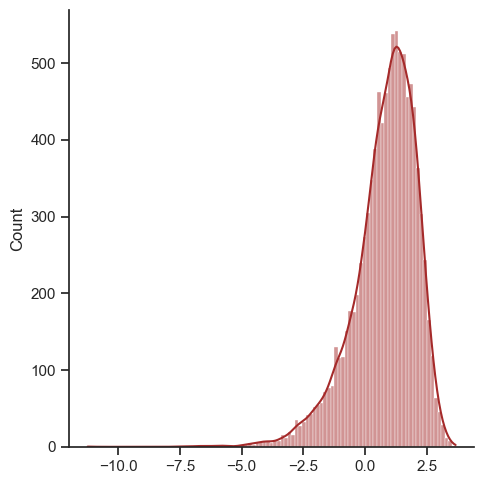

In [323]:
_ = sns.displot(np.log(x), color='brown', kde=True)

### z-scores

Предполагая нормально распределенные данные, z-оценка показывает, как далеко в размере стандартных отклонений находится наше наблюдение от среднего значения выборки:
$$ z = \frac{x_i-\mu}{\sigma} $$


Например вы получили 85 баллов на тесте, вроде неплохо и ваш результат лучший относительно ваших коллег где среднее значение 60 баллов и стандартное отклонение 10 баллов

In [324]:
x_i = 85
mu = 60
sigma = 10

In [325]:
x = np.random.normal(mu, sigma, 10000)

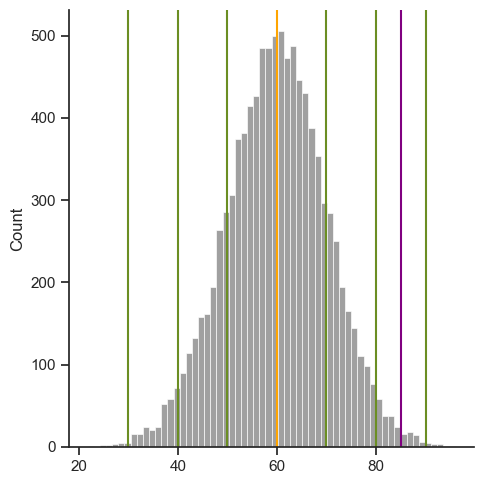

In [326]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')


Ваша z-оценка больше среднего значения на 2,5 стандартных отклонений

In [327]:
z = (x_i - mu)/sigma
z

2.5

In [328]:
z = (x_i - np.mean(x))/np.std(x)
z

2.4854302148440395

# Confidence intervals

In [329]:
data_scientists_salaries_usd = [117313, 104002, 113038, 101936, 84560, 113136, 80740, 100536, 105052, 87201, 91986, 94868, 90745, 102848, 85926, 112276, 108637, 96818, 92307, 114563, 122901, 91225, 101001, 97501, 99100, 91420, 89540]

Когда стандартное отклонение генеральной совокупности известно:

In [330]:
def create_confidence_intervals(data_points):
    sample_mean = np.mean(data_points)

    # suppose we already now population standard deviation
    population_std = 15000.0

    # sample standard error
    std_err = population_std / np.sqrt(len(data_points))

    # Can be found in z-tables e.g. alpha = 0.05 so the Z_alpha/2 = 0.05 / 2 = 0.025, the value to search 1 - 0.025 = 0.975 (the column val + row val = 1.9 + 0.06 = 1.96)
    reliability_factor_99 = 2.58 * std_err
    reliability_factor_95 = 1.96 * std_err

    # Results
    print(f"We are 95% confident that the average data scientist salary will be in the interval [${round(sample_mean - reliability_factor_95, 2)}, ${round(sample_mean + reliability_factor_95, 2)}]")
    print(f"We are 99% confident that the average data scientist salary will be in the interval [${round(sample_mean - reliability_factor_99, 2)}, ${round(sample_mean + reliability_factor_99, 2)}]")

    return None

In [331]:
create_confidence_intervals(data_scientists_salaries_usd)

We are 95% confident that the average data scientist salary will be in the interval [$94015.15, $105331.22]
We are 99% confident that the average data scientist salary will be in the interval [$92225.37, $107121.0]


In [332]:
len(data_scientists_salaries_usd)

27

Когда стандартное отклонение генеральной совокупности нам не известно

In [333]:
def students_t_distribution_confidence_interval(data_points):
    # Obtain statistics for sample
    sample_mean = np.mean(data_points)
    sample_std = np.std(data_points)
    sample_std_err = sample_std / np.sqrt(len(data_points))

    # T-stat table degrees = 27 len(datapoints) and alpha 0.05/2 = 0.025 -> the value 2.052
    t_stat_95_cli = 2.052

    print(f"We are 95% confident due to T-distribution that the average data scientist salary will be in the interval [${round(sample_mean - t_stat_95_cli * sample_std_err, 2)}, ${round(sample_mean + t_stat_95_cli * sample_std_err, 2)}]")


students_t_distribution_confidence_interval(data_scientists_salaries_usd)

We are 95% confident due to T-distribution that the average data scientist salary will be in the interval [$95414.63, $103931.74]


Доверительный интерва для разности двух выборочных средних, зависимые выборки

In [334]:
avg_data_scientists_salaries_usd = [117313, 104002, 113038, 101936, 84560, 113136, 80740, 100536, 105052, 87201, 91986, 94868, 90745, 102848, 85926, 112276, 108637, 96818, 92307, 114563, 122901, 91225, 101001, 97501, 99100, 91420, 89540]

avg_data_scientists_salaries_usd_after_courses = [118313, 102122, 110038, 101936, 85560, 113636, 81740, 100436, 102212, 88201, 92986, 93868, 90745, 106848, 87926, 112676, 118637, 99818, 92307, 114963, 123000, 94225, 102001, 91501, 98100, 91420, 89540]


def dependant_two_samples_cli(sample_one, sample_two):
    samples_diff = [x-y for x,y in zip(sample_two, sample_one)]
    samples_diff_mean = np.mean(samples_diff)
    samples_diff_std = np.std(samples_diff)
    # 95% cli for t-dist 2.052
    t_stat_95 = 2.052
    print(f"We are 95% confident that taking DS courses will impact on DS salary by ${round(samples_diff_mean, 2)} +/- {round(t_stat_95 * (samples_diff_std/np.sqrt(len(samples_diff))),2)}")

In [335]:
dependant_two_samples_cli(avg_data_scientists_salaries_usd,avg_data_scientists_salaries_usd_after_courses)

We are 95% confident that taking DS courses will impact on DS salary by $502.93 +/- 1064.98


# Two populations, variance unknown and assumed to be different, samples independent, statistics t

In [336]:
apple_prices_pl_eur = [0.21, 0.4, 0.7, 0.4, 0.55, 1, 1.2, 0.88, 0.99, 0.71, 0.66, 0.51, 0.95, 0.69, 0.33, 0.55, 0.51, 0.71, 0.22, 0.78, 0.8, 0.99, 0.47, 0.55, 0.73, 0.99, 0.55, 0.18, 0.69, 0.66, 0.58, 0.71, 0.22]


apple_prices_by_eur = [2, 1, 2, 1, 2, 2.5, 1.3, 1.2, 1.7, 1.77, 1.33, 1.22, 1.15, 3.25, 1.9, 1.65, 1.54, 1.33]

In [337]:
def independent_samples_cli(sample_one, sample_two):
    pl_sample_mean = np.mean(apple_prices_pl_eur)
    by_sample_mean = np.mean(apple_prices_by_eur)

    variance_pl = np.var(apple_prices_pl_eur)
    variance_by = np.var(apple_prices_by_eur)

    t_stat_95 = 2.052

    print(f"We are 95% confident that on average the PL apples will bee {round((pl_sample_mean - by_sample_mean),2)} +/- {round(t_stat_95 * np.sqrt((variance_pl/len(sample_one)) + (variance_by/len(sample_two))),2)} cheaper (expensive).")

In [338]:
independent_samples_cli(apple_prices_pl_eur, apple_prices_by_eur)

We are 95% confident that on average the PL apples will bee -1.02 +/- 0.28 cheaper (expensive).


### Стандартизация (z-преобразование)

In [339]:
data = pd.read_csv('./datasets/hw_25000.csv', names = ['index', 'height_inches', 'weight_pounds'], header = 0 )
data.head()

,index,height_inches,weight_pounds
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [340]:
# переводим высоту в сантиметры
data['height'] = data['height_inches'] * 2.54
data.head()

,index,height_inches,weight_pounds,height
0,1,65.78331,112.9925,167.089607
1,2,71.51521,136.4873,181.648633
2,3,69.39874,153.0269,176.272800
3,4,68.21660,142.3354,173.270164
4,5,67.78781,144.2971,172.181037


In [341]:
np.mean( data['height'] ), np.std( data['height'] )

(172.702508535872, 4.830167472614602)

In [342]:
zHeight = st.mstats.zscore( data['height'] )

In [343]:
np.mean( zHeight ), np.std( zHeight )

(6.814104835939361e-16, 0.9999999999999998)

In [344]:
customHeight = 185

In [345]:
zScore = ( customHeight - np.mean( data['height'] ) ) / np.std( data['height'] )
zScore

2.5459762076264587

In [346]:
1 - st.norm.cdf( zScore )

0.005448630770914842

In [347]:
# доверительный интервал для заданного уровня значимости
st.norm.interval( 0.95 )

(-1.959963984540054, 1.959963984540054)

In [348]:
st.norm.interval( 0.99 )

(-2.5758293035489004, 2.5758293035489004)

### Доверительный интервал

In [349]:
sample = data.head(100)
se = np.std( sample['height'] ) / np.sqrt( len(sample['height']) )
confidenceCoef = st.norm.interval( 0.95 )[1]
( np.mean( sample['height'] ) - confidenceCoef * se, np.mean( sample['height'] ) + confidenceCoef * se )

(172.172854688968, 173.9837128390321)

# Сравнение средних

$H_0$ : среднее значение X равно некоторому известному значению m

t-статистика

\begin{equation*}
\LARGE
t = \frac{\overline{X} - m}{S_X / \sqrt{n}}
\end{equation*}

\begin{equation*}
\LARGE
s^2_X = \frac{ \sum_{t=1}^n (X_t - \overline{X})^2 }{(n - 1)}
\end{equation*}

In [ ]:
data = pd.read_csv( './datasets/hw_25000.csv', names = ['index', 'height_inches', 'weight_pounds'], header = 0 )
data['height'] = data['height_inches'] * 2.54
data.head()

In [ ]:
data['sample'] = data['height'] + 3
data.head()


In [ ]:

bins = np.linspace(150, 190, 50)
plt.hist(data['height'], bins, alpha=0.5)
plt.hist(data['sample'], bins, alpha=0.5)
plt.show()


In [ ]:
plt.hist(data['sample'].head(20), bins)
plt.show()
sample = data['sample'].head(20).tolist()

In [ ]:
sample = data['sample'].head(20).tolist()
sample

In [ ]:
np.mean( sample )

In [ ]:
data['height'].mean()

In [ ]:
st.ttest_1samp( sample, data['height'].mean())

Двухвыборочный критерий

\begin{equation*}
\LARGE
t = \frac{ \overline{X_1} - \overline{X_2} }{(\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}
\end{equation*}

In [ ]:
plt.hist( data['sample'].head(20), bins, alpha = 0.5 )
plt.hist( data['height'].tail(20), bins, alpha = 0.5 )
plt.show()

In [ ]:
sampleHead = data['sample'].head(20).tolist()
sampleTail = data['height'].tail(20).tolist()

In [ ]:
sampleHead

In [ ]:
sampleTail

In [ ]:
st.ttest_ind( sampleHead, sampleTail )